In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [114]:
from google.colab import files
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [115]:
slr=pd.read_csv('Salary_Data.csv')

## EDA

In [116]:
slr.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [118]:
slr.tail()


,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [119]:
slr.shape

(30, 2)

In [120]:
slr.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [121]:
slr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# **Plotting the data to check for outliers**


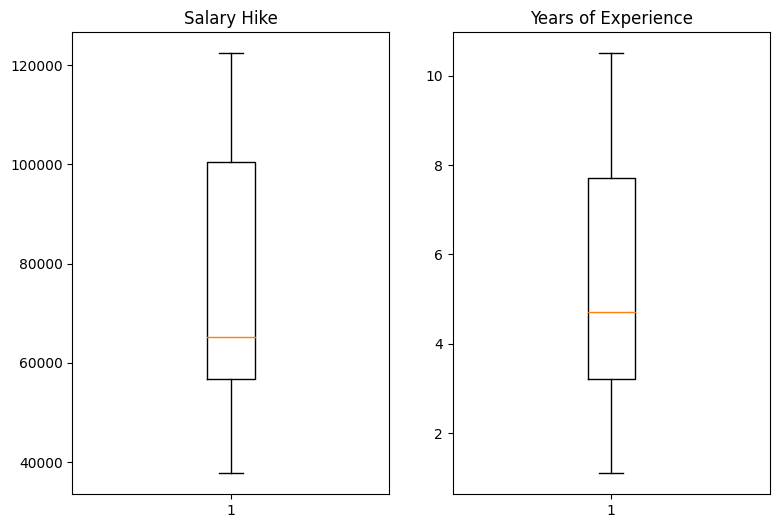

In [124]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(slr['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(slr['YearsExperience'])
plt.title('Years of Experience')
plt.show()


# As you can see there are no Outliers in the data


# Correlation Ananlysis

In [125]:
slr.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# **Checking the Correlation between variables**


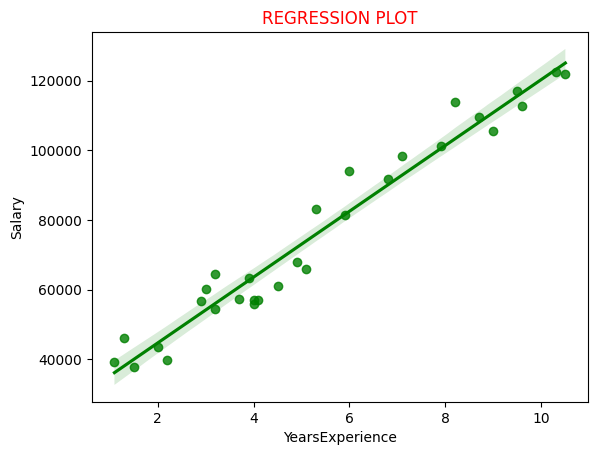

In [132]:
sns.regplot(x=slr['YearsExperience'],y=slr['Salary'],color='green')
plt.title('REGRESSION PLOT',color='red')
plt.show()


# As you can see There is good correlation between the two variables.

# Therefore the score is more than 0.8 which is good sign.

# Data Visualization

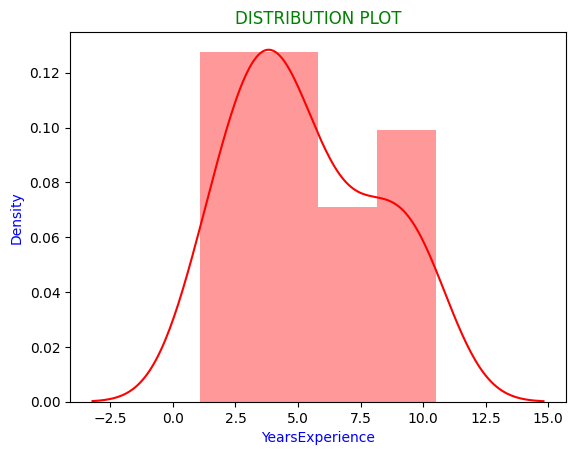

In [133]:
sns.distplot(slr['YearsExperience'],color='red')
plt.xlabel('YearsExperience',color='blue')
plt.ylabel('Density',color='blue')
plt.title('DISTRIBUTION PLOT',color='green')
plt.show()

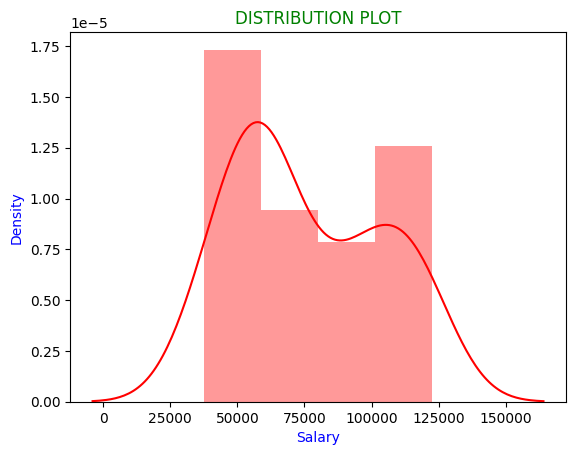

In [134]:
sns.distplot(slr['Salary'],color='red')
plt.xlabel('Salary',color='blue')
plt.ylabel('Density',color='blue')
plt.title('DISTRIBUTION PLOT',color='green')
plt.show()

# Trying different transformation of data to estimate normal distribution and to remove any skewness

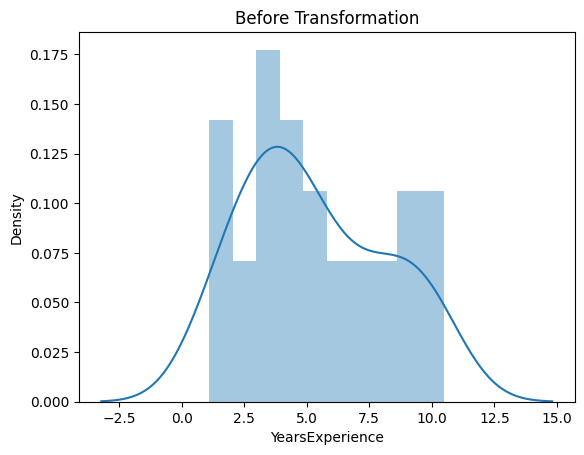

In [135]:
sns.distplot(slr['YearsExperience'],bins = 10,kde = True)
plt.title('Before Transformation')
plt.show()

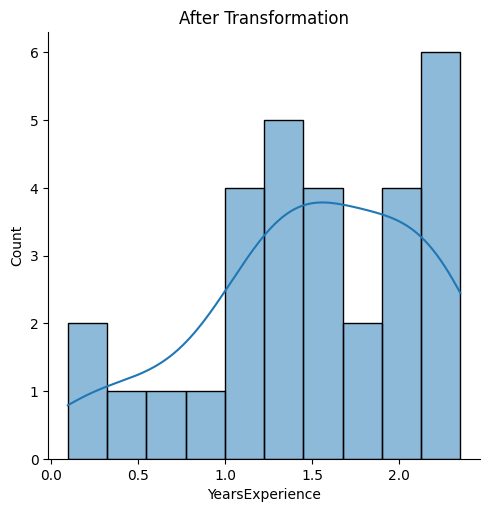

In [136]:
sns.displot(np.log(slr['YearsExperience']),bins = 10,kde = True)
plt.title('After Transformation')
plt.show()

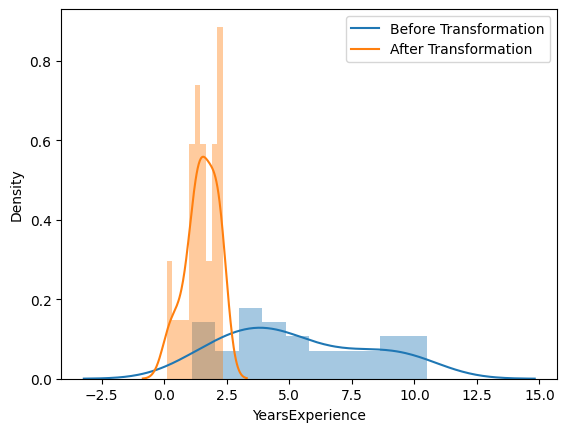

In [137]:
labels=['Before Transformation','After Transformation']
sns.distplot(slr['YearsExperience'],bins = 10,kde = True)
sns.distplot(np.log(slr['YearsExperience']),bins = 10,kde = True)
plt.legend(labels)
plt.show()

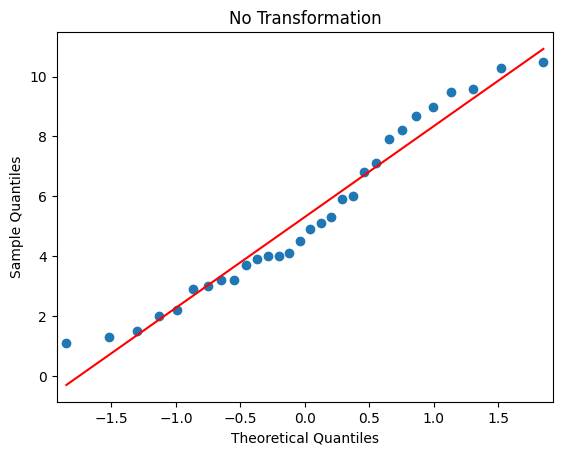

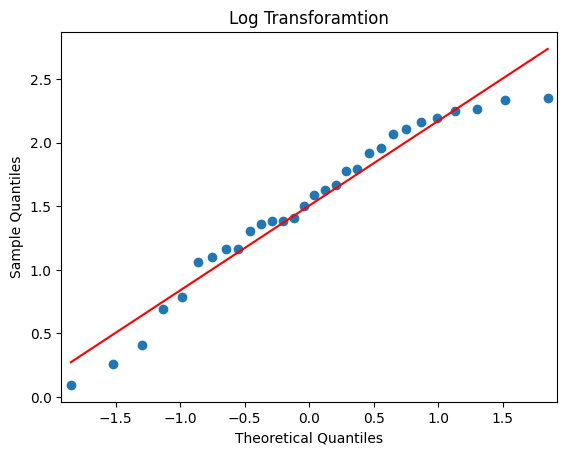

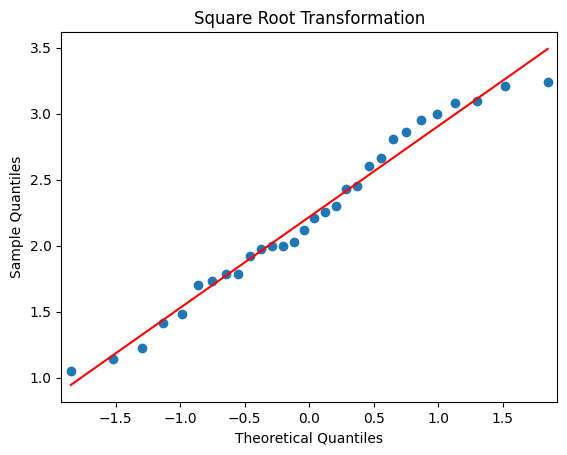

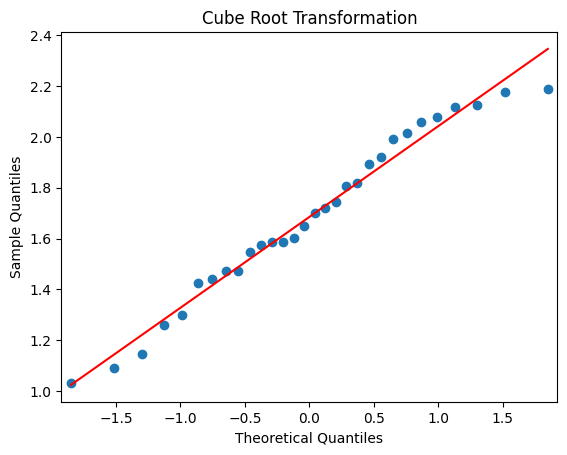

In [138]:
sm.qqplot(slr['YearsExperience'],line='r')
plt.title('No Transformation')
sm.qqplot(np.log(slr['YearsExperience']),line='r')
plt.title('Log Transforamtion')
sm.qqplot(np.sqrt(slr['YearsExperience']),line='r')
plt.title('Square Root Transformation')
sm.qqplot(np.cbrt(slr['YearsExperience']),line='r')
plt.title('Cube Root Transformation')
plt.show()

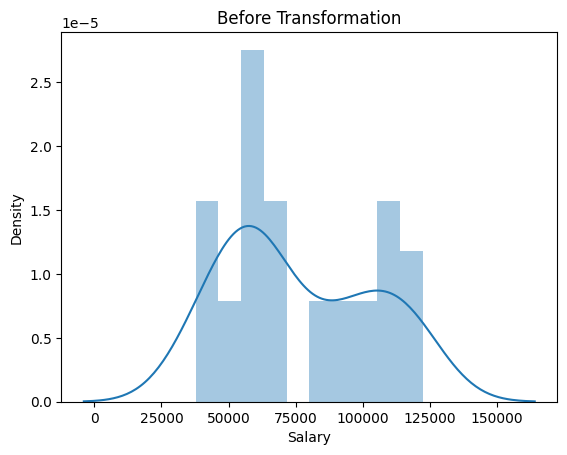

In [143]:
sns.distplot(slr['Salary'],bins = 10,kde = True)
plt.title('Before Transformation')
plt.show()

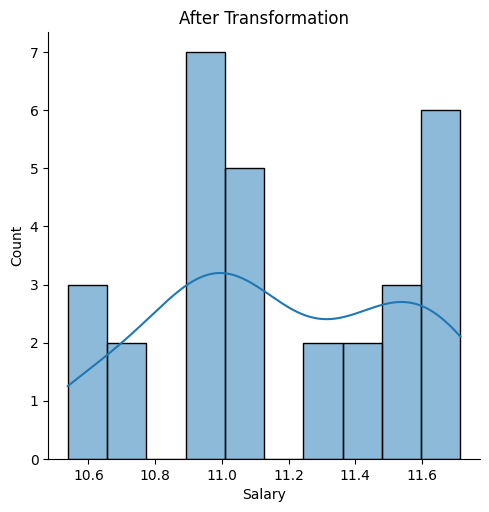

In [146]:
sns.displot(np.log(slr['Salary']),bins = 10,kde = True)
plt.title('After Transformation')
plt.show()

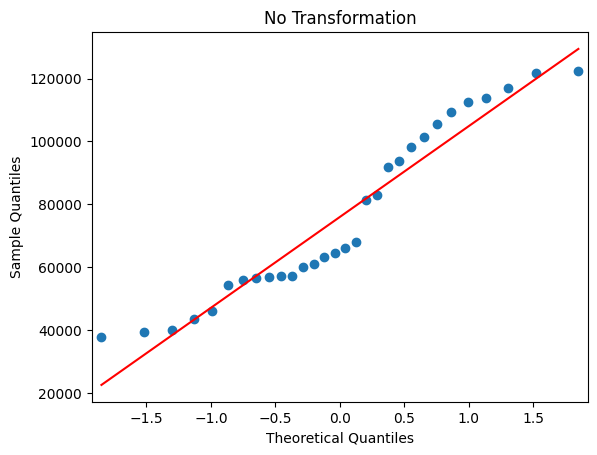

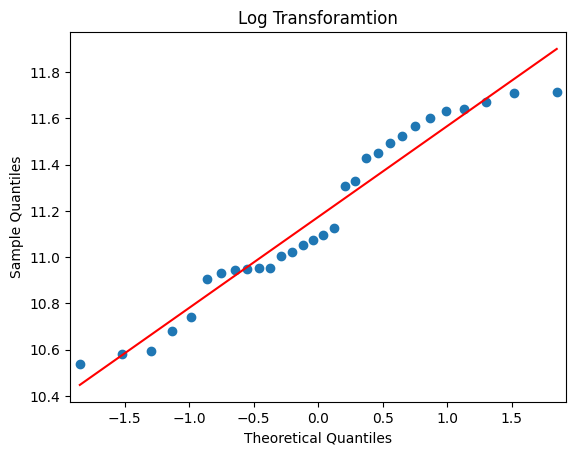

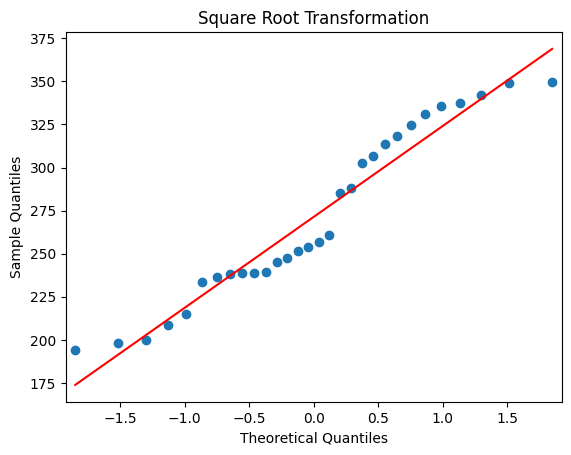

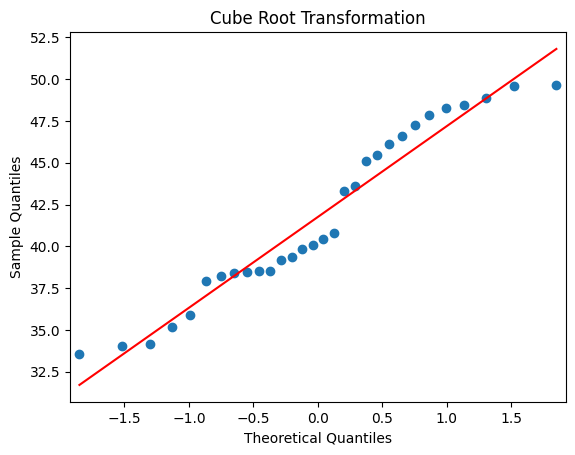

In [147]:
sm.qqplot(slr['Salary'],line='r')
plt.title('No Transformation')
sm.qqplot(np.log(slr['Salary']),line='r')
plt.title('Log Transforamtion')
sm.qqplot(np.sqrt(slr['Salary']),line='r')
plt.title('Square Root Transformation')
sm.qqplot(np.cbrt(slr['Salary']),line='r')
plt.title('Cube Root Transformation')
plt.show()

# Fitting a Linear Regression Model
Using Ordinary least squares (OLS) regression


In [148]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = slr).fit()

In [149]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [150]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

# As you can notice in the above model

# The R-squared and Adjusted R-squared scores are still below 0.85.

# (It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)

# Lets Try some data transformation to check whether these scores can get any higher than this.

# **Square Root transformation on data**


In [151]:
model1 = smf.ols("np.sqrt(Salary)~np.sqrt(YearsExperience)",data = slr).fit()

In [152]:
model1.params

Intercept                   103.568031
np.sqrt(YearsExperience)     75.626932
dtype: float64

In [153]:
(model1.rsquared,model1.rsquared_adj)

(0.9419490138976825, 0.9398757643940283)

# Adjusted R-squared scores have increased but they are still below 0.85

# Lets Try other data transformation to check whether these scores can get any higher than this.


# **Cube Root transformation on Data**


In [154]:
model2 = smf.ols("np.cbrt(Salary)~np.cbrt(YearsExperience)",data = slr).fit()

In [155]:
model2.params

Intercept                   16.660277
np.cbrt(YearsExperience)    14.896252
dtype: float64

In [156]:
(model2.rsquared,model2.rsquared_adj)

(0.9324434036761003, 0.9300306680931039)

#  Adjusted R-squared scores have increased but they are still below 0.85

# Lets Try other data transformation to check whether these scores can get any higher than this.


# **Log transformation on Data**


In [157]:
model3 = smf.ols("np.log(Salary)~np.log(YearsExperience)",data = slr).fit()

In [158]:
model3.params

Intercept                  10.328043
np.log(YearsExperience)     0.562089
dtype: float64

In [159]:
(model3.rsquared,model3.rsquared_adj)

(0.905215072581715, 0.9018298966024905)

# **Model is that Simple Linear regression model where we did not perfrom any data transformation and got the highest Adjusted R-squared value**

# **Predicting values**


In [160]:
predicted = pd.DataFrame()
predicted['YearsExperience'] = slr.YearsExperience
predicted['Salary'] = slr.Salary
predicted['Predicted_Salary'] = pd.DataFrame(model.predict(predicted.YearsExperience))
predicted

,YearsExperience,Salary,Predicted_Salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


# **Predicitng from Original Model without any data transformation**


In [112]:
predicted1 = pd.DataFrame()
predicted1['sorting_time'] = slr.sorting_time
predicted1['delivery_Time'] = slr.delivery_time
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(predicted1.sorting_time))
predicted1


,sorting_time,delivery_Time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913


In [76]:
(model3.rsquared,model3.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

In [77]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)